# Section 2-1 - Basic Neural Network - MNIST

In this section, we'll apply techniques developed so far on the MNIST dataset. The MNIST dataset consists of hand-drawn digits from zero to nine. Each image is 28 pixels in height and 28 pixels in width, with the pixel value an integer between 0 and 255.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from time import time

np.random.seed(1337)

df = pd.read_csv('data/mnist.csv')

For illustrative purposes, the first example is shown with pixel values between 0 and 10.

In [2]:
for item in df.iloc[0, 1:].values.reshape(28,28)/26:
    print(''.join(str([int(term) for term in item]).split(' ')))

[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,9,3,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,9,9,3,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,9,9,6,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,9,8,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,9,9,2,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,9,9,3,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,9,9,6,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,9,6,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,9,9,3,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,1,9,9,9,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,7,9,9,7,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,6,9,9,7,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,7,9,9,2,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0

A hand-drawn 1 can clearly be seen from the visualization in grayscale.

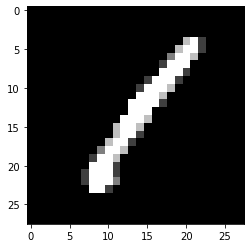

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(df.iloc[0, 1:].values.reshape(28,28), cmap=plt.get_cmap('gray', 5))
plt.show()

There are 42,000 images. We similarly split the images 80:20 into training and test sets, and scale the data through division by 255. 

In [4]:
df_train = df.iloc[:33600, :]

X_train = df_train.iloc[:, 1:].values / 255.
y_train = df_train['label'].values
y_train_onehot = pd.get_dummies(df_train['label']).values

In [5]:
df_test = df.iloc[33600:, :]

X_test = df_test.iloc[:, 1:].values / 255.
y_test = df_test['label'].values

## Benchmark

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0, verbose=3)
model = model.fit(X_train, df_train['label'].values)

y_prediction = model.predict(X_test)
print("\naccuracy", np.sum(y_prediction == df_test['label'].values) / float(len(y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



accuracy 0.965


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


## 1-layer Neural Network

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation

start = time()

model = Sequential()
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot, epochs=12)

model.summary()

print('\ntime taken %s seconds' % str(time() - start))

Epoch 1/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.9514 - accuracy: 0.7779
Epoch 2/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.8662
Epoch 3/12
1050/1050 [==============================] - 2s 1ms/step - loss: 0.4574 - accuracy: 0.8797
Epoch 4/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4203 - accuracy: 0.8870
Epoch 5/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3970 - accuracy: 0.8922
Epoch 6/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3805 - accuracy: 0.8960: 0s - loss: 0.3829 - accuracy: 
Epoch 7/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3681 - accuracy: 0.8983
Epoch 8/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3584 - accuracy: 0.9011
Epoch 9/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3504 - accuracy: 0.9029
Epoch 10/12
1050/1050 [===========================

In [8]:
y_prediction = np.argmax(model.predict(X_test), axis=-1)
print("\naccuracy", np.sum(y_prediction == y_test) / float(len(y_test)))


accuracy 0.9098809523809523


## 2-layer Neural Network

In [9]:
start = time()

model = Sequential()
model.add(Dense(100))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot, epochs=12)

model.summary()

print('\ntime taken %s seconds' % str(time() - start))

Epoch 1/12
1050/1050 [==============================] - 3s 2ms/step - loss: 0.7151 - accuracy: 0.8142
Epoch 2/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3980 - accuracy: 0.8896
Epoch 3/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3527 - accuracy: 0.9004
Epoch 4/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3307 - accuracy: 0.9062
Epoch 5/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3167 - accuracy: 0.9103
Epoch 6/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3068 - accuracy: 0.9131
Epoch 7/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2998 - accuracy: 0.9160
Epoch 8/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2935 - accuracy: 0.9171
Epoch 9/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2885 - accuracy: 0.9173
Epoch 10/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.284

In [10]:
y_prediction = np.argmax(model.predict(X_test), axis=-1)
print("\naccuracy", np.sum(y_prediction == y_test) / float(len(y_test)))


accuracy 0.9192857142857143


## 3-layer Neural Network

In [11]:
start = time()

model = Sequential()
model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot, epochs=12)

model.summary()

print('\ntime taken %s seconds' % str(time() - start))

Epoch 1/12
1050/1050 [==============================] - 3s 2ms/step - loss: 0.6432 - accuracy: 0.8235
Epoch 2/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3595 - accuracy: 0.8972
Epoch 3/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3242 - accuracy: 0.9060
Epoch 4/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3074 - accuracy: 0.9114
Epoch 5/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2966 - accuracy: 0.9151
Epoch 6/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2888 - accuracy: 0.9176
Epoch 7/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2826 - accuracy: 0.9200
Epoch 8/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2783 - accuracy: 0.9211
Epoch 9/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2739 - accuracy: 0.9219
Epoch 10/12
1050/1050 [==============================] - 2s 2ms/step - loss: 0.270

In [12]:
y_prediction = np.argmax(model.predict(X_test), axis=-1)
print("\naccuracy", np.sum(y_prediction == y_test) / float(len(y_test)))


accuracy 0.9223809523809524


As in the previous section, we were able to drive loss down even further with additional layers. While we see improvements in accuracy, it's still not enough to beat the benchmark. We'll look into more advanced techniques to enhance model performance in next section.